In [124]:
# Importing libraries and creating a connection to the SQL database we dowloaded from 538.com

import sqlite3
import pandas as pd
conn=sqlite3.connect('factbook.db')

In [125]:
#Analyzing the database and asking pandas to show all the tables within it

q="select * from sqlite_master where type='table';"
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [140]:
#Writing a query to show the first 5 rows of the table 'facts'

query="select * from facts limit 5;"
five_rows=conn.execute(query).fetchall()
five_rows

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [127]:
query2='select MIN(population), MAX(population), MIN(population_growth), MAX(population_growth), MIN(birth_rate), MAX(birth_rate), MIN(death_rate), MAX(death_rate) from facts where (population>0 and population<7256490011);'
min_max=conn.execute(query2).fetchall()
min_max=pd.DataFrame(min_max)
min_max.columns=['Min pop','Max pop','Min growth', 'Max growth', 'MIN(birth_rate)', 'MAX(birth_rate)', 'MIN(death_rate)', 'MAX(death_rate)']
min_max

,Min pop,Max pop,Min growth,Max growth,MIN(birth_rate),MAX(birth_rate),MIN(death_rate),MAX(death_rate)
0,48,1367485388,0.0,4.02,6.65,45.45,1.53,14.89


In [128]:
query3='select name from facts where population=0;'
query4='select name from facts where population=7256490011;'
no_pop=conn.execute(query3).fetchall()
max_pop=conn.execute(query4).fetchall()
print(no_pop, max_pop)

[('Antarctica',)] [('World',)]


So the table 'facts' in the factbook.db database is considering, among all the nations of the world, also the Antarctica that clearly has no inhabitant and the whole World, summing up all the inhabitants of the different countries. That's why its total corresponds to the total amount of people in the planet.

In [182]:
query5='select name, population, population_growth, birth_rate, death_rate, area_land, area_water from facts where (population>0 and population<7256490011);'
reduced_table=conn.execute(query5).fetchall()
reduced_table=pd.DataFrame(reduced_table)
reduced_table.columns=['name','population', 'population_growth', 'birth_rate', 'death_rate', 'area_land', 'area_water']
reduced_table['density']=reduced_table['population']/reduced_table['area_land']
reduced_table['ratio_land_water']=reduced_table['area_water']/reduced_table['area_land']
print(reduced_table.isnull().sum())
reduced_table.head()

name                  0
population            0
population_growth     5
birth_rate           13
death_rate           13
area_land             7
area_water            9
density               7
ratio_land_water     11
dtype: int64


,name,population,population_growth,birth_rate,death_rate,area_land,area_water,density,ratio_land_water
0,Afghanistan,32564342,2.32,38.57,13.89,652230.0,0.0,49.927697,0.000000
1,Albania,3029278,0.30,12.92,6.58,27398.0,1350.0,110.565662,0.049274
2,Algeria,39542166,1.84,23.67,4.31,2381741.0,0.0,16.602211,0.000000
3,Andorra,85580,0.12,8.13,6.96,468.0,0.0,182.863248,0.000000
4,Angola,19625353,2.78,38.78,11.49,1246700.0,0.0,15.741841,0.000000


D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


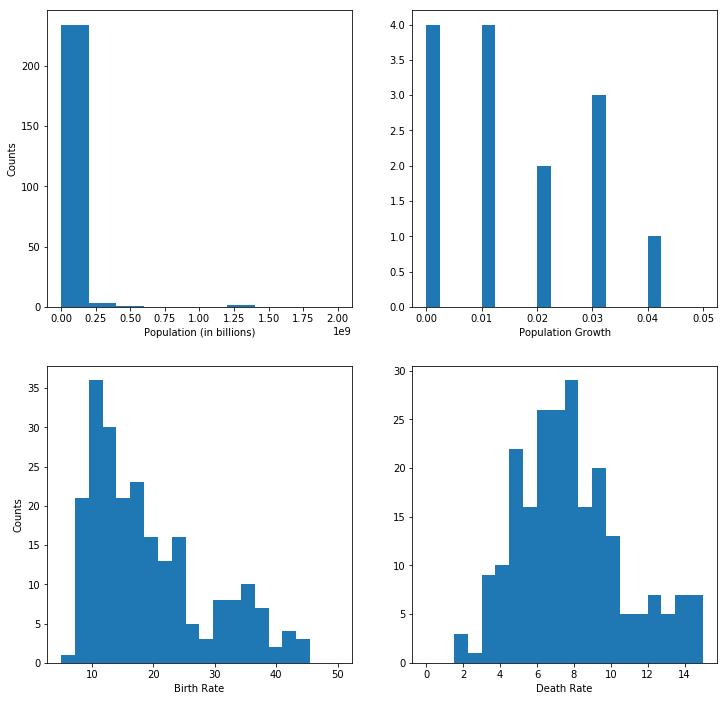

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,2,1)
ax1.hist(reduced_table['population'], range=(0, 2000000000))
ax1.set_xlabel('Population (in billions)')
ax1.set_ylabel('Counts')
ax2=fig.add_subplot(2,2,2)
ax2.hist(reduced_table['population_growth'], 20, range=(0.0,0.05))
ax2.set_xlabel('Population Growth')
ax3=fig.add_subplot(2,2,3)
ax3.hist(reduced_table['birth_rate'], 20, range=(5,50))
ax3.set_xlabel('Birth Rate')
ax3.set_ylabel('Counts')
ax4=fig.add_subplot(2,2,4)
ax4.hist(reduced_table['death_rate'], 20, range=(0,15))
ax4.set_xlabel('Death Rate')
plt.show()




In [144]:
# Let's calculate the percentage of countries in the world having less than 10M inhabitants.

query6='select population from facts where (population>0 and population<10000000);'
less_ten=conn.execute(query6).fetchall()
less_ten=pd.DataFrame(less_ten)
proportion_inhab=less_ten.shape[0]/reduced_table.shape[0]
proportion_inhab=round(proportion_inhab,2)

# Let's calculate the percentage of countries in the world having having a population growt inferior to 1.
query7='select population from facts where population_growth<1;'
small_grow=conn.execute(query7).fetchall()
small_grow=pd.DataFrame(small_grow)
proportion_grow=small_grow.shape[0]/reduced_table.shape[0]
proportion_grow=round(proportion_grow,2)

# Let's calculate the percentage of countries in the world having having a population growt equal to 0.
query10='select population from facts where population_growth=0;'
no_growth=conn.execute(query10).fetchall()
no_growth=pd.DataFrame(no_growth)
proportion_nogrow=no_growth.shape[0]/reduced_table.shape[0]
proportion_nogrow=round(proportion_nogrow,2)

# Let's calculate the percentage of countries in the world having a birth rate inferior to 10.
query8='select population from facts where birth_rate<10;'
small_birth=conn.execute(query8).fetchall()
small_birth=pd.DataFrame(small_birth)
proportion_birth=small_birth.shape[0]/reduced_table.shape[0]
proportion_birth=round(proportion_birth,2)

# Let's calculate the percentage of countries in the world having a death rate inferior to 10.

query9='select population from facts where death_rate<10;'
small_death=conn.execute(query9).fetchall()
small_death=pd.DataFrame(small_death)
proportion_death=small_death.shape[0]/reduced_table.shape[0]
proportion_death=round(proportion_death,2)

print('Countries in the world having less than 10M inhabitants: {0}, PERCENTAGE:{1}%'.format(less_ten.shape[0], proportion_inhab*100))
print('Countries in the world having a population growth inferior to 1: {0}, PERCENTAGE:{1}%'.format(small_grow.shape[0],proportion_grow*100))
print('Countries in the world having a population growth equal to 0: {0}, PERCENTAGE:{1}%'.format(no_growth.shape[0],proportion_nogrow*100))
print('Countries in the world having a birth rate inferior to 10: {0}, PERCENTAGE:{1}%'.format(small_birth.shape[0],proportion_birth*100))
print('Countries in the world having a death rate inferior to 10: {0}, PERCENTAGE:{1}%'.format(small_death.shape[0],proportion_death*100))

Countries in the world having less than 10M inhabitants: 151, PERCENTAGE:63.0%
Countries in the world having a population growth inferior to 1: 112, PERCENTAGE:47.0%
Countries in the world having a population growth equal to 0: 4, PERCENTAGE:2.0%
Countries in the world having a birth rate inferior to 10: 30, PERCENTAGE:12.0%
Countries in the world having a death rate inferior to 10: 182, PERCENTAGE:76.0%


These histograms show that the vast majority of the countries of our planet (~63%) has a population inferior to 10M inhabitants while just two countries (China and India) have a population larger than 1 billion inhabitants.
Taking into consideration the population growth it seems that almost half of the countries (~46%) have a growth inferior to 1, while those countries that have a null growth (which means that the number of births is pretty much equal to the number of deaths) are just 4 and represent  ~1.6%
Finally only 12.5% of the countries has a birth rate inferior to 10 while again the majority of the countries (~76%) has a death rate inferior to 10. 

In [82]:
#Calculating which country has the highest density

query11='select name, ROUND(MAX(CAST(population AS FLOAT)/CAST(area_land AS FLOAT)),3) from facts;'
max_dens=conn.execute(query11).fetchall()
query12='select name, ROUND(MIN(CAST(population AS FLOAT)/CAST(area_land AS FLOAT)),3) from facts where population>0;'
min_dens=conn.execute(query12).fetchall()
print('The country with the highest density in the world ({0} people per square km) is {1}'.format(max_dens[0][1],max_dens[0][0]))
print('The country with the lowest density in the world ({0} people per square km) is {1}'.format(min_dens[0][1],min_dens[0][0]))

The country with the highest density in the world (21168.964 people per square km) is Macau
The country with the lowest density in the world (0.027 people per square km) is Greenland


So basically Macau is the country with the highest density in the world (21168.964 people per square km) and Greenland is the country with the lowest density in the world (0.027 people per square km).

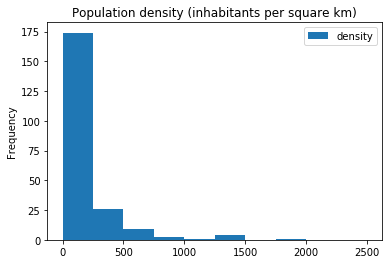

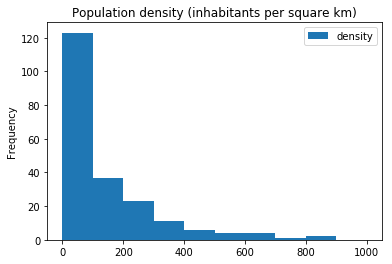

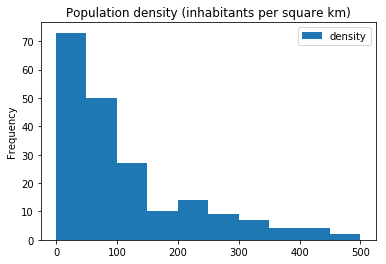

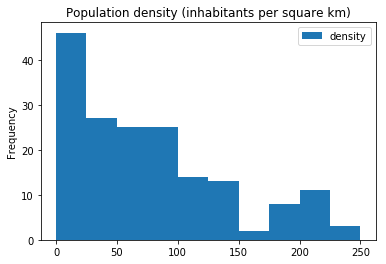

In [133]:
no_null=reduced_table.dropna()

no_null.plot.hist(y='density',title='Population density (inhabitants per square km)', range=(0,2500))
no_null.plot.hist(y='density',title='Population density (inhabitants per square km)', range=(0,1000))
no_null.plot.hist(y='density',title='Population density (inhabitants per square km)', range=(0,500))
no_null.plot.hist(y='density',title='Population density (inhabitants per square km)', range=(0,250))
plt.show()


In [145]:
#Calculating the percentage of countries with a density below 25 inh/km^2
low_dens=no_null[no_null['density']<=100]
proportion_lowdens=low_dens.shape[0]/reduced_table.shape[0]
proportion_lowdens=round(proportion_lowdens,2)

print('Countries in the world having a population density inferior to 100 inh/km^2: {} Percentage:{}%'.format(low_dens.shape[0],proportion_lowdens*100))

Countries in the world having a population density inferior to 100 inh/km^2: 123 Percentage:51.0%


So a little more than half of all the countries in the world (51%) have a population density inferior to 100 inhabitants per square kilometer. 

In [212]:
#The highest ratio water/land:
print('The highest ratio water/land is: {0}'.format(reduced_table['ratio_land_water'].value_counts().index.values.max()))

#The country that has the highest ratio is:
country_high_ratio=reduced_table.loc[reduced_table['ratio_land_water']==reduced_table['ratio_land_water'].value_counts().index.values.max(), 'name']
print('The country with the highest ratio water/land is: {0}'.format(country_high_ratio.values))

#The lowest ratio water/land:
print('The lowest ratio water/land is: {0}, which means no water, only land.'.format(reduced_table['ratio_land_water'].value_counts().index.values.min()))

#Number of countries with the lowest ratio (0.0):
null_ratio=reduced_table.loc[reduced_table['ratio_land_water']==reduced_table['ratio_land_water'].value_counts().index.values.min(), 'name']
null_ratio.count()
proportion_null_ratio=null_ratio.count()/reduced_table.shape[0]
proportion_null_ratio=round(proportion_null_ratio,2)
print('The number of countries with the lowest ratio water/land is: {0}, Percentage: {1}%'.format(null_ratio.count(),proportion_null_ratio*100))

#Number of countries with more wather than land:
more_water=reduced_table.loc[reduced_table['ratio_land_water']>1.0,'name']
print('Countries with more water than land: {0}'.format(more_water.values))

#query14='select name, area_water from facts where area_water=0.0;'
#no_water=conn.execute(query14).fetchall()
#no_water

#reduced_table.plot.hist(y='ratio_land_water',range=(0,5))
#plt.show()





The highest ratio water/land is: 4.520231213872832
The country with the highest ratio water/land is: ['Virgin Islands']
The lowest ratio water/land is: 0.0, which means no water, only land.
The number of countries with the lowest ratio water/land is: 78, Percentage: 32.0%
Countries with more water than land: ['Virgin Islands']


So apparently the country the has the highest ratio water on land is the Virgin Islands which has 4.5 times more water than land; this is also the only country which has more water than land. On the other hand there are 78 countries in the world, representing 32% of the 240 countries listed in our database, which have a null ratio. We must remember that the water area is the sum of the surfaces of all inland water bodies, such as lakes, reservoirs, or rivers. Territorial waters are not included.